In [8]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hashlib
import seaborn as sns
%matplotlib inline
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [9]:
#DATASET_PATH = '/home/helios/Python/ML/Ch2/Ch2/datasets/housing/housing.csv'
DATASET_PATH = 'C:\\Users\\DevAccessa\\Documents\\VS\\Pt\\ML\\Ch2\\C2\\datasets\\housing\\housing.csv'

In [10]:

def load_lboss_data(lboss_path=DATASET_PATH):
    return pd.read_csv(lboss_path)

In [11]:
lboss = load_lboss_data()
lboss.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [12]:
lboss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
lboss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
lboss.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
#lboss.hist(bins=50,figsize=(20,15))
#plt.show()

In [16]:
def show_hash(hash_num,last_index=False):
    for i in range(hash_num.digest_size):
        if last_index:
            print(hash_num.digest()[-1])
            break
        else:
            print(hash_num.digest()[i])

In [17]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(lboss,0.2)

In [19]:
print("train set:{} test set:{}".format(len(train_set),len(test_set)))

train set:16512 test set:4128


In [20]:
def test_set_check(identifier, test_ratio, hash_func):
    return hash_func(np.int64(identifier)).digest()[-1] < 256*test_ratio
def split_train_test(data,test_ratio,identifier_column_name,hash_func=hashlib.md5):
    ids = data[identifier_column_name]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio, hash_func))
    return data.loc[in_test_set],data.loc[~in_test_set]

In [21]:
lboss_with_id = lboss.reset_index()
train_set,test_set = split_train_test(lboss_with_id[:5],0.2,'index')

In [22]:
print("train set:{} test set:{}".format(len(train_set),len(test_set)))

train set:1 test set:4


In [23]:
show_hash(hashlib.md5(np.int64(1)),True)

203


In [24]:
show_hash(hashlib.md5(np.int64(2)),True)

100


In [25]:
show_hash(hashlib.md5(np.int64(3)),True)

244


In [26]:
show_hash(hashlib.md5(np.int64(4)),True)

18


In [27]:
show_hash(hashlib.md5(np.int64(0)),True)

116


In [28]:
for i in range(10):
    show_hash(hashlib.md5(np.int64(i)),True)

116
203
100
244
18
16
237
183
215
182


In [29]:
lboss.median_income.min()

0.4999

In [30]:
lboss.median_income.max()

15.0001

In [31]:
from sklearn.model_selection import train_test_split
tr_set,ts_set = train_test_split(lboss,test_size=0.2,random_state=42)

In [32]:
len(tr_set)

16512

In [33]:
lboss_new = lboss.copy(deep=True)
lboss_new["income_cat"] = np.ceil(lboss["median_income"]/1.5)
lboss_new.head()
lboss_new.income_cat.value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [34]:
lboss_new["income_cat"].where(lboss_new["income_cat"]<5.0,5.0,inplace=True)
lboss_new.income_cat.value_counts()/len(lboss_new)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [35]:
#plt.bar(sorted(list(lboss_new.income_cat.value_counts().index)),lboss_new.income_cat.value_counts().values)

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(lboss_new,lboss_new["income_cat"]):
    print("Train_index:",train_index)
    print("Test_index:",test_index)
    print("type:",type(train_index))
    strat_train_set = lboss_new.loc[train_index]
    strat_test_set = lboss_new.loc[test_index]

Train_index: [17606 18632 14650 ... 13908 11159 15775]
Test_index: [ 5241 10970 20351 ...  4019 12107  2398]
type: <class 'numpy.ndarray'>


In [37]:
strat_train_set.income_cat.value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [38]:
strat_test_set.income_cat.value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [39]:
#now remove the income_cat column
for set_ in (strat_train_set,strat_test_set):
    set_.drop(['income_cat'],axis=1,inplace=True)

In [40]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [41]:
lboss_w = strat_train_set.copy()

In [42]:
#lboss_w.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1);

In [43]:
corr_matrix = lboss_w.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [44]:
corr_matrix["median_house_value"]

longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

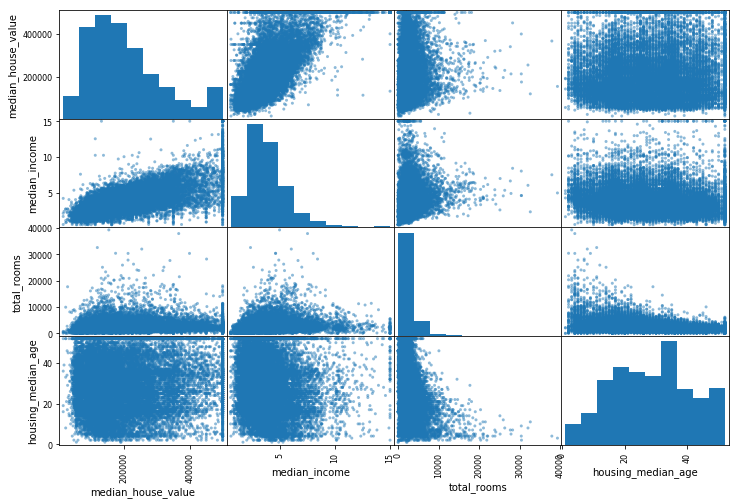

In [45]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(lboss[attributes],figsize=(12,8));

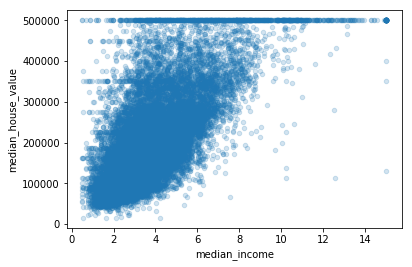

In [46]:
lboss.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2);

This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward
trend and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible
as a horizontal line at USD500,000. But this plot reveals other less obvious straight lines: a horizontal line
around USD450,000, another around USD350,000, perhaps one around USD280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms from learning to
reproduce these data quirks.

In [47]:
lboss_w["rooms_per_household"] = lboss_w["total_rooms"]/lboss_w["households"]
lboss_w["bedrooms_per_room"] = lboss_w["total_bedrooms"]/lboss_w["total_rooms"]
lboss_w["population_per_household"] = lboss_w["population"]/lboss_w["households"]

In [48]:
lboss_w.corr().median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house
value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio
tend to be more expensive. The number of rooms per household is also more informative than the total
number of rooms in a district — obviously the larger the houses, the more expensive they are.

### Prepare the Data for Machine Learning Algorithms

let’s revert to a clean training set (by copying strat_train_set once again), and let’s separate
the predictors and the labels since we don’t necessarily want to apply the same transformations to the
predictors and the target values

In [49]:
lboss_predictors_unmodified = strat_train_set.drop("median_house_value",axis=1)
lboss_labels = strat_train_set["median_house_value"].copy()
lboss_predictors = lboss_predictors_unmodified.copy()

In [50]:
lboss_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to
take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so
let’s fix this. You have three options:
- Get rid of the corresponding districts.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).
You can accomplish these easily using DataFrame’s dropna() , drop() , and fillna() methods:

In [51]:
lboss_predictors.dropna(subset=["total_bedrooms"]) #option 1
lboss_predictors.drop("total_bedrooms",axis=1) #opton 2
#option 3 - we have decided to replace missing values with the median value
median = lboss_predictors["total_bedrooms"].median()
lboss_predictors.total_bedrooms.fillna(median,inplace=True)

In [52]:
lboss_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Scikit-Learn provides a handy class to take care of missing values: Imputer . Here is how to use it. First,
you need to create an Imputer instance, specifying that you want to replace each attribute’s missing
values with the median of that attribute:

In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, we need to create a copy of the data
without the text attribute ocean_proximity :

In [54]:
lboss_predictors = lboss_predictors_unmodified.copy()
lboss_predictors_num = lboss_predictors.drop("ocean_proximity",axis=1)
lboss_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Now you can fit the imputer instance to the training data using the fit() method:

In [55]:
imputer.fit(lboss_predictors_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result in its statistics_
instance variable.

In [56]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [57]:
lboss_predictors_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [58]:
lboss_predictors_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


Now you can use this “trained” imputer to transform the training set by replacing missing values by the
learned medians:

In [59]:
X = imputer.transform(lboss_predictors_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

The result is a plain Numpy array containing the transformed features. If you want to put it back into a
Pandas DataFrame, it’s simple:

In [60]:
lboss_train = pd.DataFrame(X,columns=lboss_predictors_num.columns)

In [61]:
lboss_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


Main Scikit-Learn objects are:
- Estimators: Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer ’s strategy ), and it must be set as an instance variable (generally via a constructor parameter).
- Transformers: Some estimators (such as an imputer ) can also transform a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer . All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).
- Predictors: Finally, some estimators are capable of making predictions given a dataset; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: it predicted life satisfaction given a country’s GDP per capita. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions given a test set (and the corresponding labels in the case of supervised learning algorithms).
- All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy ), and all the estimator’s learned parameters are also accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_ ).

### Handling text and categorical attributes
Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot
compute its median. Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these text labels to numbers. 
Scikit-Learn provides a transformer for this task called OrdinalEncoder :

In [62]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
lboss_cat = lboss_predictors["ocean_proximity"]
lboss_cat_encoded = encoder.fit_transform(lboss_cat.values.reshape(-1,1))
lboss_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

This is better: now we can use this numerical data in any ML algorithm. You can look at the mapping that
this encoder has learned using the classes_ attribute (“<1H OCEAN” is mapped to 0, “INLAND” is mapped to 1, etc.):

Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot
vectors. OneHotEncoder can also directly convert string categorical values to One hot vectors. 

In [63]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
lboss_cat_1hot = encoder.fit_transform(lboss_cat.values.reshape(-1,1))
lboss_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [64]:
#to convert a sparse matrix to a dense matrix
lboss_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Custom Transformers
You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: fit() (returning
self), transform(), and fit_transform(). You can get the last one for free by simply adding TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid *args and **kargs in your constructor) you will get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):# no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        population_per_household = X[:,population_ix]/X[:,household_ix]
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household,bedrooms_per_room]
        return np.c_[X,rooms_per_household, population_per_household]

In [66]:
attr_reader = CombinedAttributesAdder(add_bedrooms_per_room=False)
lboss_extra_attribs = attr_reader.transform(lboss_predictors_unmodified.values)
lboss_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

### Feature Scaling
There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.
- min-max scaling: (Also called Normalization). Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this.
- Standardization: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Scikit-Learn provides a transformer called StandardScaler for standardization.

Note: Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. 

#### WARNING: 
As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

### Transformation Pipelines
As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

lboss_predictors_num_tr = num_pipeline.fit_transform(lboss_predictors_num)
lboss_predictors_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like (as long as they don’t contain double underscores “__”). 

When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers,
passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the fit() method.

The pipeline exposes the same methods as the final estimator. In this example, the last estimator is a StandardScaler, which is a transformer, so the pipeline has a transform() method that applies all the transforms to the data in sequence (it also has a fit_transform method that we could have used instead of calling fit() and then transform()).

### Custom transformer to extract numerical columns from a dataframe 
(so we dont have to manually do it)

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values


In [69]:
num_attribs = list(lboss_predictors_num.columns)
cat_attribs = ["ocean_proximity"]

In [70]:
from sklearn.preprocessing import OrdinalEncoder

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('1hot_encoder',OneHotEncoder(sparse=False)),
])

In [71]:
#join the two pipelines
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
])

# run the whole pipeline
lboss_prepared = full_pipeline.fit_transform(lboss_predictors)
lboss_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Note: ColumnTransformer
ColumnTransformer class can do the job of DataFrameSelector that we wrote and is the Pythonic way to do

In [72]:
#redoing the full_pipeline using ColumnTransformer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('simple_imputer',SimpleImputer(strategy='median')),
    ('add_attributes',CombinedAttributesAdder(add_bedrooms_per_room=False)),
    ('std_scaler',StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_attribs),
    ('cat_pipeline',OneHotEncoder(),cat_attribs)
])

lboss_prepared = full_pipeline.fit_transform(lboss_predictors)

### Training and Evaluating on the Training Set

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(lboss_prepared,lboss_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
some_data = lboss_predictors_unmodified.iloc[:10000]
some_labels = lboss_labels.iloc[:10000]
some_data_prepared = full_pipeline.fit_transform(some_data)
some_data_prepared.shape
print("Predictions:",lin_reg.predict(some_data_prepared))

Predictions: [212000.13812566 321214.730514   211183.76742829 ... 268998.74401983
  70391.37631692 219480.56272507]


In [75]:
some_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [76]:
from sklearn.metrics import mean_squared_error

lboss_predictions = lin_reg.predict(lboss_prepared)
lin_mse = mean_squared_error(lboss_labels,lboss_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68911.76054233838

In [77]:
lboss_labels.max()

500001.0

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

#strat_train_set.median_house_value.hist(bins=50)

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(lboss_prepared,lboss_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [80]:
lboss_predictions = tree_reg.predict(lboss_prepared)
tree_mse = mean_squared_error(lboss_predictions,lboss_labels)
tree_mse

0.0

In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,lboss_prepared,lboss_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())
    
display_scores(tree_rmse_scores)

Scores: [70625.29174665 68381.87886555 69267.85313237 71576.05911421
 69742.64666572 73470.37322469 71586.19178692 69528.5607298
 76648.91516154 68145.57328434]
Mean: 70897.334371177
Standard Deviation 2459.1089667054857


In [82]:
scores = cross_val_score(lin_reg,lboss_prepared,lboss_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [67461.9308165  67232.2484863  68224.22888082 74716.58955656
 68420.26897488 71610.91469695 65201.58349349 68686.9304607
 72262.5140762  68112.28697795]
Mean: 69192.94964203317
Standard Deviation 2674.1447265970173


In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
scores = cross_val_score(forest_reg,lboss_prepared,lboss_labels,
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

C:\ProgramData\Anaconda3\envs\ch2_venv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\ch2_venv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\ch2_venv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\ch2_venv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaco

Scores: [51890.50717899 49729.30323179 52567.4526216  55498.39260808
 52269.36216644 56098.57745273 51051.5603528  50239.97688794
 55235.09181428 52446.56620509]
Mean: 52702.67905197489
Standard Deviation 2105.3403516452827
